In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#  CHARGEMENT
DATA_PATH = r"C:\Users\Lenovo\Desktop\FinalProjectDeepLearning-main\data\Course_Completion_Prediction.csv"
df = pd.read_csv(DATA_PATH)

#  2. DÉFINITION DES CIBLES (Noms exacts de ton fichier) 

target_names = [
    'Project_Grade', 
    'Quiz_Score_Avg', 
    'Progress_Percentage', 
    'Satisfaction_Rating', 
    'Assignments_Submitted' 
]


cols_to_drop = target_names + ['Student_ID', 'Name', 'Course_ID', 'Course_Name', 'Enrollment_Date', 'Completed']
X = df.drop(columns=cols_to_drop)
y = df[target_names]

#  NETTOYAGE & ENCODAGE 
df = df.fillna(df.median(numeric_only=True))

le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col].astype(str))

#  SPLIT & STANDARDISATION 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

#  CONVERSION PYTORCH (Tensors & DataLoaders) 
X_train_t = torch.tensor(scaler_X.fit_transform(X_train), dtype=torch.float32)
X_test_t  = torch.tensor(scaler_X.transform(X_test), dtype=torch.float32)
y_train_t = torch.tensor(scaler_y.fit_transform(y_train), dtype=torch.float32)
y_test_t  = torch.tensor(scaler_y.transform(y_test), dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=32, shuffle=False)

print(f" Données prêtes pour la régression !")
print(f"Nombre de variables en entrée : {X_train_t.shape[1]}")
print(f"Nombre de cibles en sortie : {y_train_t.shape[1]}")

✅ Données prêtes pour la régression !
Nombre de variables en entrée : 29
Nombre de cibles en sortie : 5


In [2]:
print(df.columns.tolist())

['Student_ID', 'Name', 'Gender', 'Age', 'Education_Level', 'Employment_Status', 'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_ID', 'Course_Name', 'Category', 'Course_Level', 'Course_Duration_Days', 'Instructor_Rating', 'Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate', 'Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login', 'Notifications_Checked', 'Peer_Interaction_Score', 'Assignments_Submitted', 'Assignments_Missed', 'Quiz_Attempts', 'Quiz_Score_Avg', 'Project_Grade', 'Progress_Percentage', 'Rewatch_Count', 'Enrollment_Date', 'Payment_Mode', 'Fee_Paid', 'Discount_Used', 'Payment_Amount', 'App_Usage_Percentage', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Satisfaction_Rating', 'Completed']


In [ ]:
import torch.nn as nn

class StudentRegressor(nn.Module):
    def __init__(self, input_size):
        super(StudentRegressor, self).__init__()
        
        # Définition des couches linéaires (Input -> 64 -> 32 -> 5)
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        
        # OBLIGATOIRE : 5 neurones pour tes 5 cibles numériques
        self.fc3 = nn.Linear(32, 5) 
        
        # Activation et régularisation
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Passage dans la structure
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        
        # Sortie finale (pas d'activation car c'est de la régression)
        return self.fc3(x)

# Initialisation du modèle avec le nombre de variables de ton X
input_dim = X_train_t.shape[1]
model = StudentRegressor(input_size=input_dim)

print(f"Modèle prêt avec {input_dim} entrées et 5 sorties.")


Modèle prêt avec 29 entrées et 5 sorties.


In [ ]:
import torch.optim as optim

# Fonction de perte : MSELoss

criterion = nn.MSELoss()

# Optimiseur : Adam 

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

print("✅ Étape 4 terminée : MSELoss et Optimiseur Adam configurés.")

✅ Étape 4 terminée : MSELoss et Optimiseur Adam configurés.


In [ ]:
import torch.nn as nn

# NOUVELLE ARCHITECTURE (MÉTHODE 1) 
class StudentRegressor(nn.Module):
    def __init__(self, input_size):
        super(StudentRegressor, self).__init__()
        # On augmente la capacité : 128 -> 64 -> 32
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 5)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1) 

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        return self.fc4(x)

#  NOUVELLE CONFIGURATION 
model = StudentRegressor(X_train_t.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)
criterion = nn.MSELoss()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

print(" Lancement de l'entraînement amélioré...")
# Relance ici ta boucle d'entraînement habituelle

🚀 Lancement de l'entraînement amélioré...


In [ ]:
#Code Bratch training
import time

# Configuration
epochs = 100
train_losses = []

# Pour la Méthode 2 (Scheduler)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

print("🚀 Lancement de l'entraînement combiné...")
start_time = time.time()

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        # MÉTHODE 1 : Standard Batch Training
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    
    # MÉTHODE 2 : Mise à jour du Scheduler
    scheduler.step(epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Époque [{epoch+1}/{epochs}] | Loss: {epoch_loss:.4f} | LR: {current_lr}")

print(f"Entraînement terminé en {time.time() - start_time:.2f}s")

🚀 Lancement de l'entraînement combiné...
Époque [10/100] | Loss: 0.5847 | LR: 6.25e-05
Époque [20/100] | Loss: 0.5844 | LR: 6.25e-05
Époque [30/100] | Loss: 0.5842 | LR: 3.125e-05
Époque [40/100] | Loss: 0.5838 | LR: 1.5625e-05
Époque [50/100] | Loss: 0.5839 | LR: 3.90625e-06
Époque [60/100] | Loss: 0.5840 | LR: 1.953125e-06
Époque [70/100] | Loss: 0.5840 | LR: 9.765625e-07
Époque [80/100] | Loss: 0.5837 | LR: 4.8828125e-07
Époque [90/100] | Loss: 0.5835 | LR: 1.220703125e-07
Époque [100/100] | Loss: 0.5836 | LR: 6.103515625e-08
✅ Entraînement terminé en 1451.90s


In [ ]:
# 1. On passe le modèle en mode 'evaluation'
model.eval() 

with torch.no_grad(): 
    predictions_scaled = model(X_test_t)
    
    
    y_pred = scaler_y.inverse_transform(predictions_scaled.numpy())
    y_true = scaler_y.inverse_transform(y_test_t.numpy())

print("✅ Prédictions terminées.")

✅ Prédictions terminées.


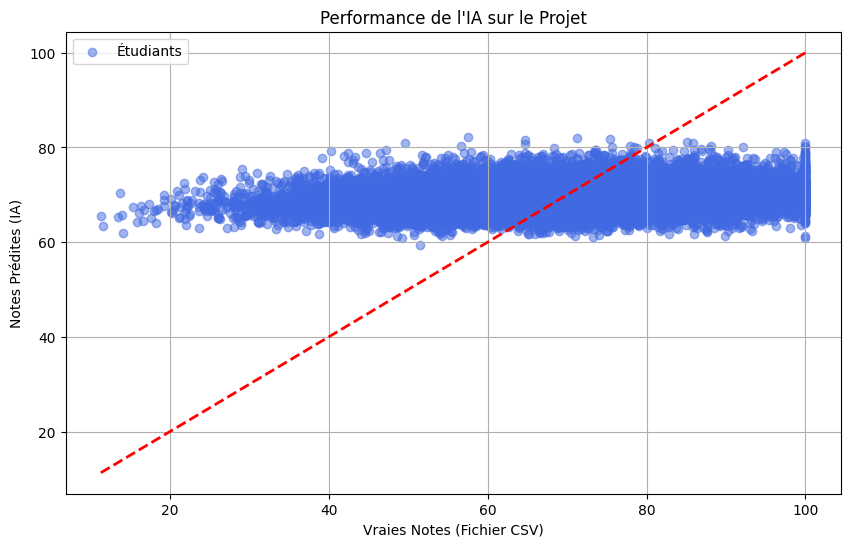

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# On affiche la première note 
plt.scatter(y_true[:, 0], y_pred[:, 0], alpha=0.5, color='royalblue', label='Étudiants')

plt.plot([y_true[:, 0].min(), y_true[:, 0].max()], [y_true[:, 0].min(), y_true[:, 0].max()], 'r--', lw=2)

plt.xlabel('Vraies Notes (Fichier CSV)')
plt.ylabel('Notes Prédites (IA)')
plt.title('Performance de l\'IA sur le Projet')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Sauvegarder le modèle PyTorch
torch.save(model.state_dict(), 'mon_ia_etudiant.pth')

# Sauvegarder les scalers (indispensable pour réutiliser le modèle plus tard)
import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

print("💾 Tout est sauvegardé ! Tu peux fermer ton notebook l'esprit tranquille.")

💾 Tout est sauvegardé ! Tu peux fermer ton notebook l'esprit tranquille.


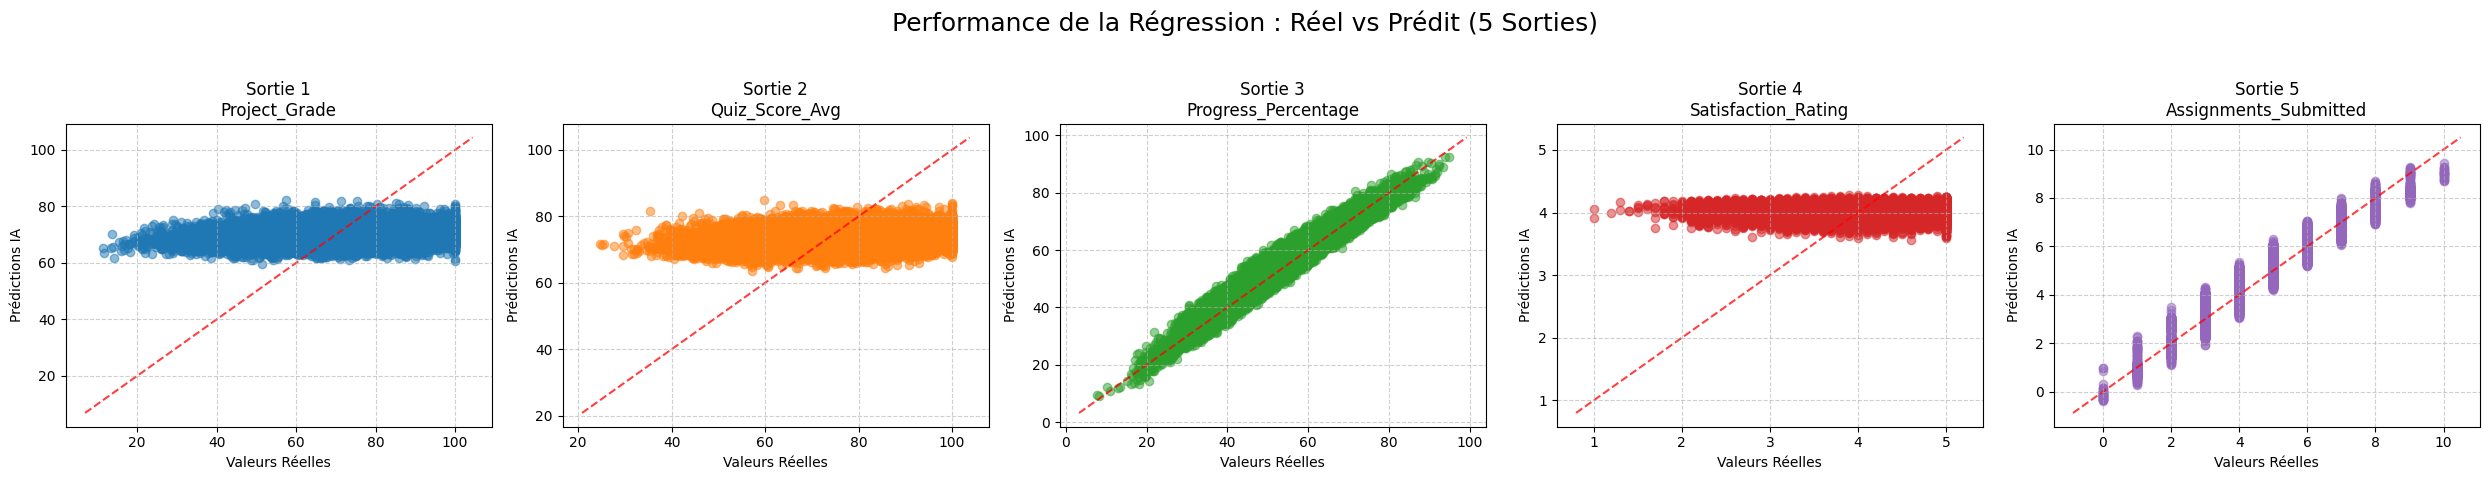

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  

# 1. Calcul des prédictions
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_t)
    y_true = scaler_y.inverse_transform(y_test_t.numpy())
    y_pred = scaler_y.inverse_transform(y_pred_scaled.numpy())

# 2. Configuration de la figure (1 ligne, 5 colonnes)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Performance de la Régression : Réel vs Prédit (5 Sorties)', fontsize=18)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(5):
    # Nuage de points
    axes[i].scatter(y_true[:, i], y_pred[:, i], alpha=0.5, color=colors[i])
    
    # Calcul des limites pour la diagonale avec NumPy (np)
    lims = [
        np.min([axes[i].get_xlim(), axes[i].get_ylim()]), 
        np.max([axes[i].get_xlim(), axes[i].get_ylim()])
    ]
    
    # Ligne de référence rouge (diagonale)
    axes[i].plot(lims, lims, 'r--', alpha=0.75, zorder=1)
    
    # Titres et labels
    axes[i].set_title(f"Sortie {i+1}\n{target_names[i]}", fontsize=12)
    axes[i].set_xlabel('Valeurs Réelles')
    axes[i].set_ylabel('Prédictions IA')
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

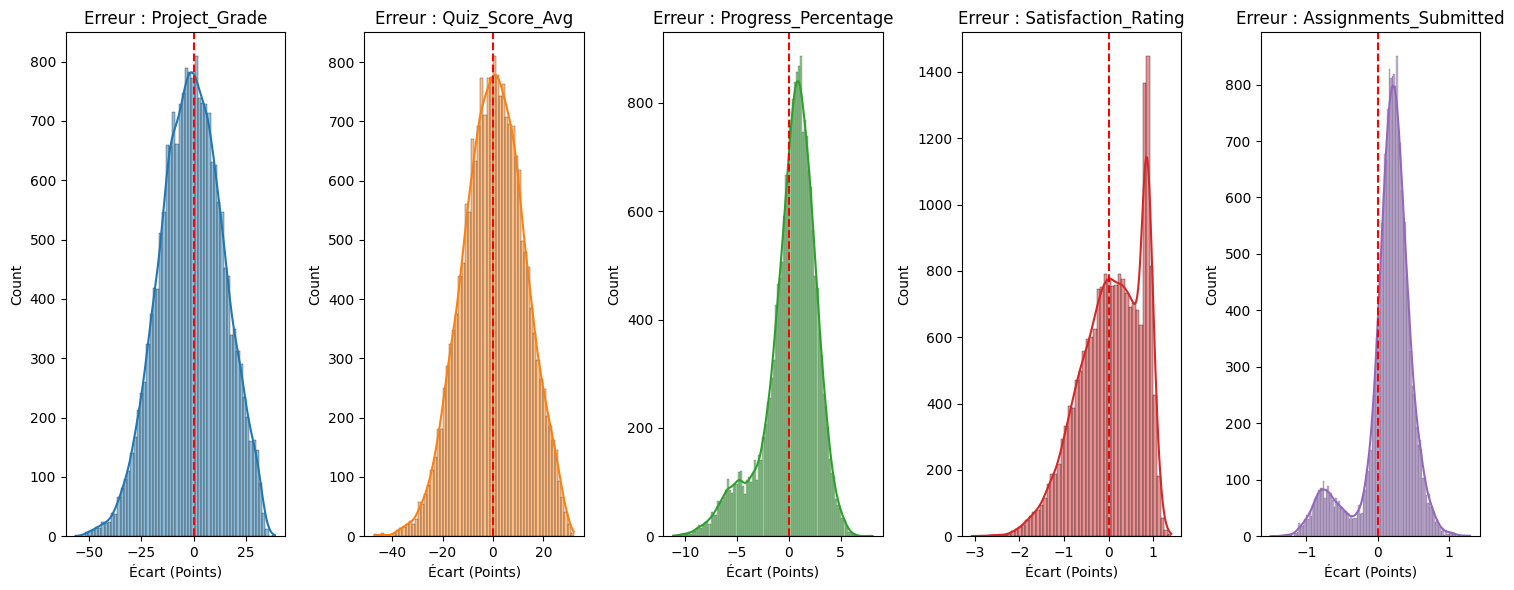

In [ ]:
import seaborn as sns

# On calcule l'erreur 
errors = y_true - y_pred

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    sns.histplot(errors[:, i], kde=True, color=colors[i])
    plt.axvline(x=0, color='red', linestyle='--')
    plt.title(f"Erreur : {target_names[i]}")
    plt.xlabel("Écart (Points)")

plt.tight_layout()
plt.show()


In [ ]:
def simulateur_ia_correct(index_etudiant):
    model.eval()
    
   
    input_etudiant = X_test_t[index_etudiant].unsqueeze(0) 
    
    with torch.no_grad():
        # 2. Prédiction
        pred_scaled = model(input_etudiant)
        # 3. Dé-normalisation
        resultat = scaler_y.inverse_transform(pred_scaled.numpy())
        reel = scaler_y.inverse_transform(y_test_t[index_etudiant].unsqueeze(0).numpy())
    
    print(f"📊 Analyse de l'étudiant test n°{index_etudiant} :")
    print("-" * 30)
    for i, nom in enumerate(target_names):
        print(f"{nom:25} | IA: {resultat[0][i]:.2f} | Réel: {reel[0][i]:.2f}")

# Teste sur l'étudiant n°10 de ton jeu de test
simulateur_ia_correct(10)

📊 Analyse de l'étudiant test n°10 :
------------------------------
Project_Grade             | IA: 73.23 | Réel: 94.80
Quiz_Score_Avg            | IA: 75.87 | Réel: 67.50
Progress_Percentage       | IA: 41.93 | Réel: 44.10
Satisfaction_Rating       | IA: 4.13 | Réel: 4.00
Assignments_Submitted     | IA: 1.74 | Réel: 2.00


📊 Analyse de l'étudiant test n°10 :
--------------------------------------------------
Project_Grade             | IA: 73.23 | Réel: 94.80
Quiz_Score_Avg            | IA: 75.87 | Réel: 67.50
Progress_Percentage       | IA: 41.93 | Réel: 44.10
Satisfaction_Rating       | IA: 4.13 | Réel: 4.00
Assignments_Submitted     | IA: 1.74 | Réel: 2.00


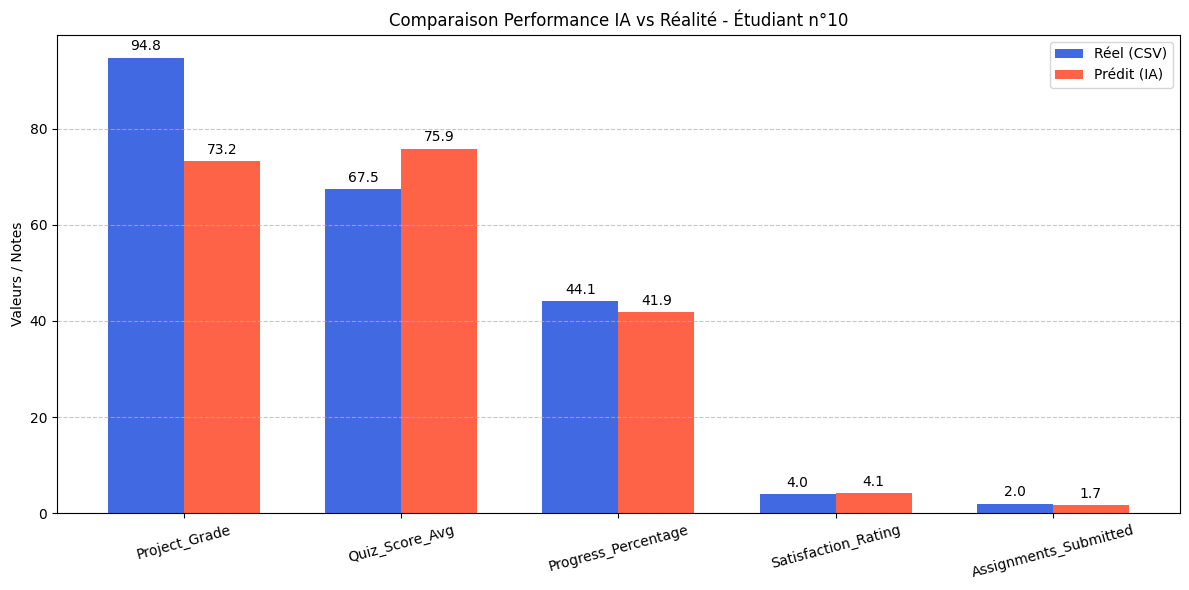

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def simulateur_ia_complet(index_etudiant):
    # 1. Mise en mode évaluation
    model.eval()
    
    # 2. Extraction et préparation de la donnée (29 features)
    input_etudiant = X_test_t[index_etudiant].unsqueeze(0) 
    
    with torch.no_grad():
        # 3. Prédiction par le modèle (Architecture nn.Module avec ReLU/Dropout)
        pred_scaled = model(input_etudiant)
        
        # 4. Dé-normalisation (Retour aux vraies échelles de notes)
        y_pred_val = scaler_y.inverse_transform(pred_scaled.numpy())[0]
        y_real_val = scaler_y.inverse_transform(y_test_t[index_etudiant].unsqueeze(0).numpy())[0]
    
    #PARTIE TEXTUELLE 
    print(f"📊 Analyse de l'étudiant test n°{index_etudiant} :")
    print("-" * 50)
    for i, nom in enumerate(target_names):
        print(f"{nom:25} | IA: {y_pred_val[i]:.2f} | Réel: {y_real_val[i]:.2f}")
    
    #  PARTIE GRAPHIQUE 
    x = np.arange(len(target_names))  # Positions des catégories
    width = 0.35  # Largeur des barres

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Création des deux barres (Bleu pour Réel, Corail pour IA)
    rects1 = ax.bar(x - width/2, y_real_val, width, label='Réel (CSV)', color='royalblue')
    rects2 = ax.bar(x + width/2, y_pred_val, width, label='Prédit (IA)', color='tomato')

    # Personnalisation des axes
    ax.set_ylabel('Valeurs / Notes')
    ax.set_title(f'Comparaison Performance IA vs Réalité - Étudiant n°{index_etudiant}')
    ax.set_xticks(x)
    ax.set_xticklabels(target_names, rotation=15)
    ax.legend()

    # Ajout des étiquettes de valeur au-dessus de chaque barre
    ax.bar_label(rects1, padding=3, fmt='%.1f')
    ax.bar_label(rects2, padding=3, fmt='%.1f')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# TEST 
simulateur_ia_complet(10)